<a href="https://colab.research.google.com/github/vdslab/aggregated-document-dendrogram/blob/main/ipynb/judgit/visdata_top2vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install top2vec[sentence_transformers]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.2 MB 6.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 24.1 MB 1.1 MB/s 
     |████████████████████████████████| 88 kB 10.0 MB/s 
     |████████████████████████████████| 79 kB 7.5 MB/s 
     |████████████████████████████████| 1.1 MB 77.7 MB/s 
     |████████████████████████████████| 4.2 MB 64.1 MB/s 
     |████████████████████████████████| 1.2 MB 64.1 MB/s 
     |████████████████████████████████| 86 kB 6.7 MB/s 
     |████████████████████████████████| 6.6 MB 82.9 MB/s 
     |████████████████████████████████| 596 kB 94.4 MB/s 
  Created wheel for hdbscan: filename=hdbscan-0.8.28-cp37-cp37m-linux_x86_64.whl size=2342176 sha256=c142044205000e0e642a84bc3591e7c6a5752f855acdcc08f78d9c5f14cc5f01
  Stored in directory: /root/.cache

In [2]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

True

In [3]:
import csv
import pandas as pd
with open('/content/drive/MyDrive/Colab Notebooks/pre-judgit/IEEE VIS papers 1990-2020 - Main dataset.csv', 'r')as f:
    df = pd.read_csv(f)

In [4]:
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tag import pos_tag
stem = PorterStemmer()
lem = WordNetLemmatizer()

def lemmatize_sentence(sentence):
    lemmatizer = WordNetLemmatizer()
    lemmatized_sentence = []
    for word, tag in pos_tag(word_tokenize(sentence)):
        if tag.startswith('NN'):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'
        lemmatized_sentence.append(lemmatizer.lemmatize(word, pos))
    return lemmatized_sentence

In [5]:
documents = []
plot_titles = []
plot_ids = []
for i, (title, abstract) in enumerate(zip(df['Title'], df['Abstract'])):
    if type(abstract) == str:
        documents.append(' '.join(lemmatize_sentence(abstract)))
        plot_titles.append(title)
        plot_ids.append(i)

In [14]:
import random
sample = random.sample(documents, 1000)

In [17]:
from top2vec import Top2Vec
model = Top2Vec(sample, 
                workers = 1,
                # doc2vec_args = {'workers': 1,
                #                 'seed': 42},
                umap_args = {'n_neighbors': 15,
                             'n_components': 5,
                             'metric': 'cosine',
                             'random_state': 42})

2022-06-07 00:16:29,096 - top2vec - INFO - Pre-processing documents for training
2022-06-07 00:16:29,483 - top2vec - INFO - Creating joint document/word embedding
2022-06-07 00:16:34,515 - top2vec - INFO - Creating lower dimension embedding of documents
2022-06-07 00:16:38,680 - top2vec - INFO - Finding dense areas of documents
2022-06-07 00:16:38,701 - top2vec - INFO - Finding topics


In [16]:
model.topic_sizes

0    195
1    186
2    185
3    148
4    130
5     58
6     55
7     43
dtype: int64

In [18]:
model.topic_sizes

0    195
1    186
2    185
3    148
4    130
5     58
6     55
7     43
dtype: int64

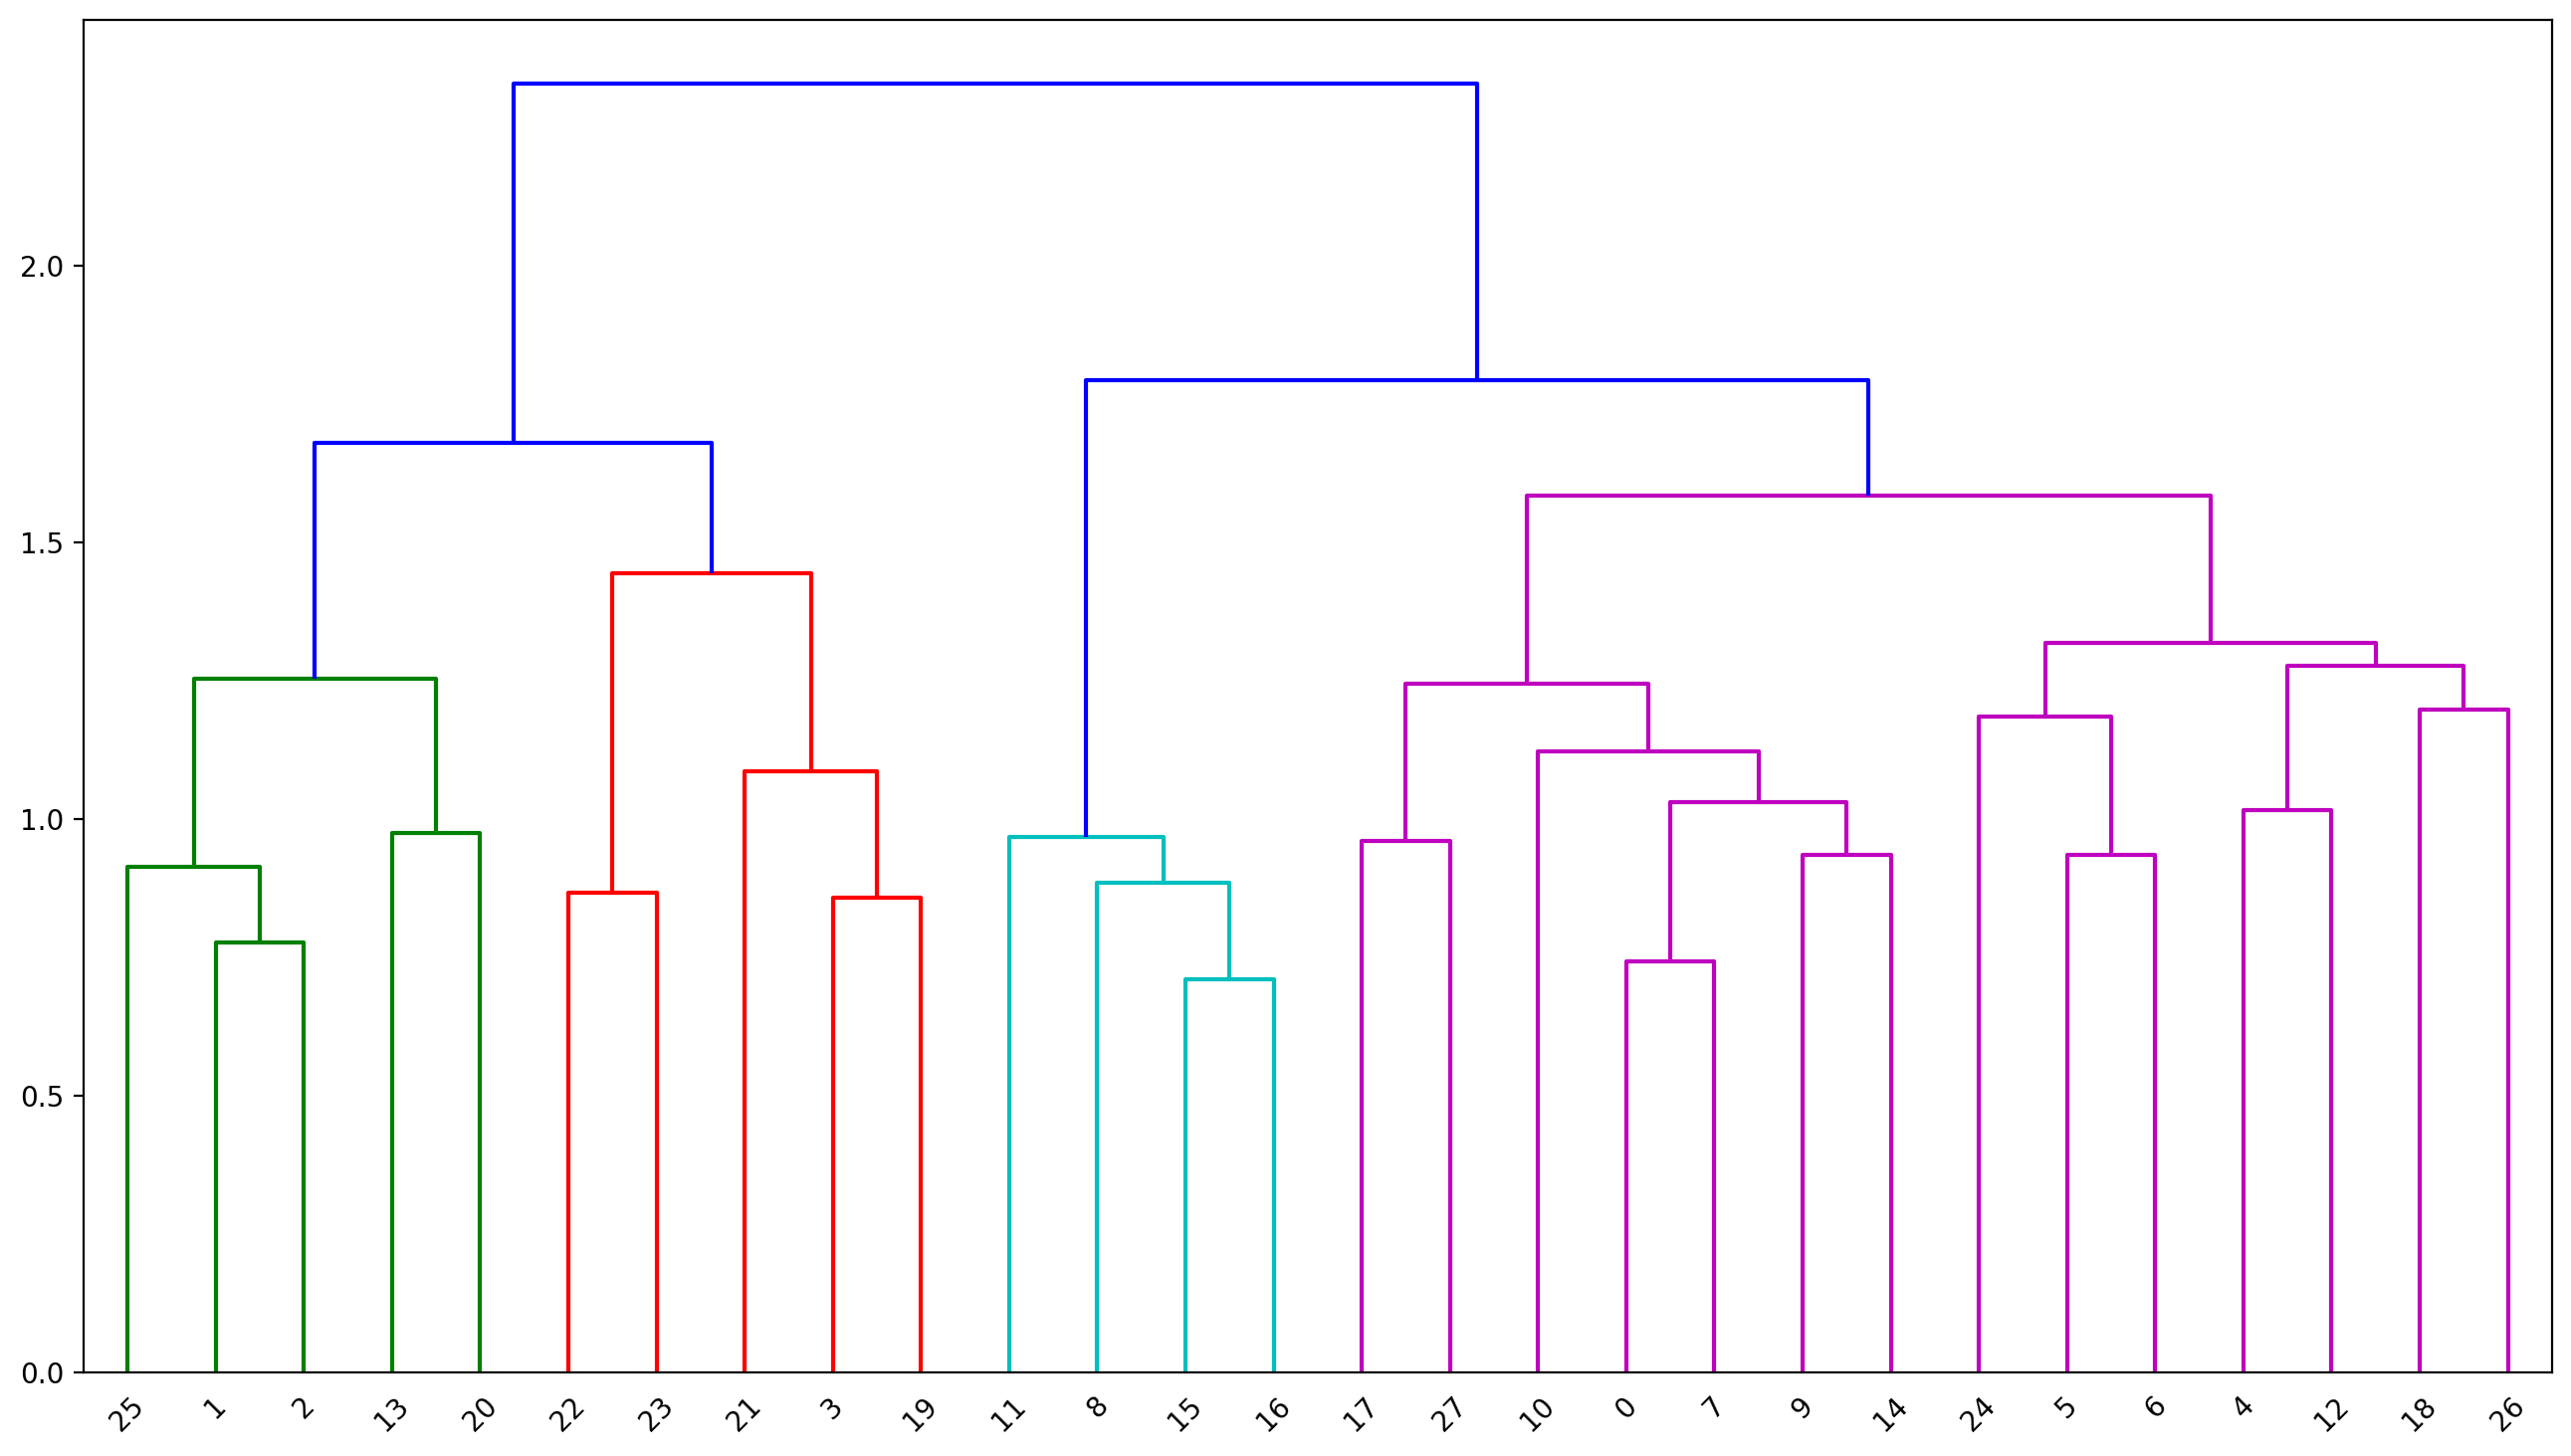

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
 
linkage_result = linkage(model.topic_vectors, method='ward', metric='euclidean')
plt.figure(num=None, figsize=(16, 9), dpi=200, facecolor='w', edgecolor='k')
dendrogram(linkage_result)
plt.show()

In [ ]:
from top2vec import Top2Vec

tmp = []
for i in range(100):
    model = Top2Vec(documents)
    tmp.append(model)

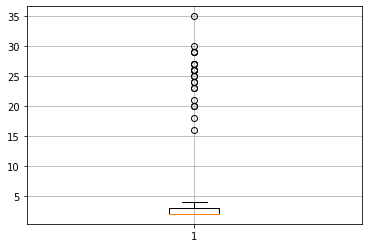

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

tmp_size = []
for model in tmp:
    tmp_size.append(len(model.topic_sizes))
plt.grid()
plt.boxplot(tmp_size)
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/judgit/VisdataTop2Vec220516.model')

In [ ]:
len(tmp[0].topic_sizes)

2

In [ ]:
for words in model.topic_words:
    print(words)

['analytics' 'collaboration' 'own' 'design' 'activity' 'sensemaking'
 'research' 'discussion' 'intelligence' 'finding' 'broad' 'conduct'
 'future' 'implication' 'interview' 'opportunity' 'reasoning' 'action'
 'experience' 'inform' 'diverse' 'infovis' 'collaborative' 'how' 'who'
 'user' 'literature' 'designer' 'goal' 'work' 'gap' 'interaction' 'tool'
 'taxonomy' 'survey' 'guideline' 'knowledge' 'analytical' 'analytic'
 'process' 'question' 'science' 'participant' 'evaluation' 'visual'
 'scenario' 'cognitive' 'explain' 'researcher' 'suggest']
['mesh' 'triangle' 'vertex' 'triangulation' 'polygonal' 'simplification'
 'subdivision' 'surface' 'adaptive' 'approximation' 'guarantee'
 'algorithm' 'geometry' 'isosurface' 'geometric' 'original' 'smooth'
 'scheme' 'multiresolution' 'tetrahedral' 'rendering' 'render'
 'approximate' 'compression' 'store' 'compute' 'arbitrary' 'memory'
 'simplify' 'refinement' 'regular' 'computation' 'connectivity'
 'interpolation' 'edge' 'exploit' 'storage' 'polygon

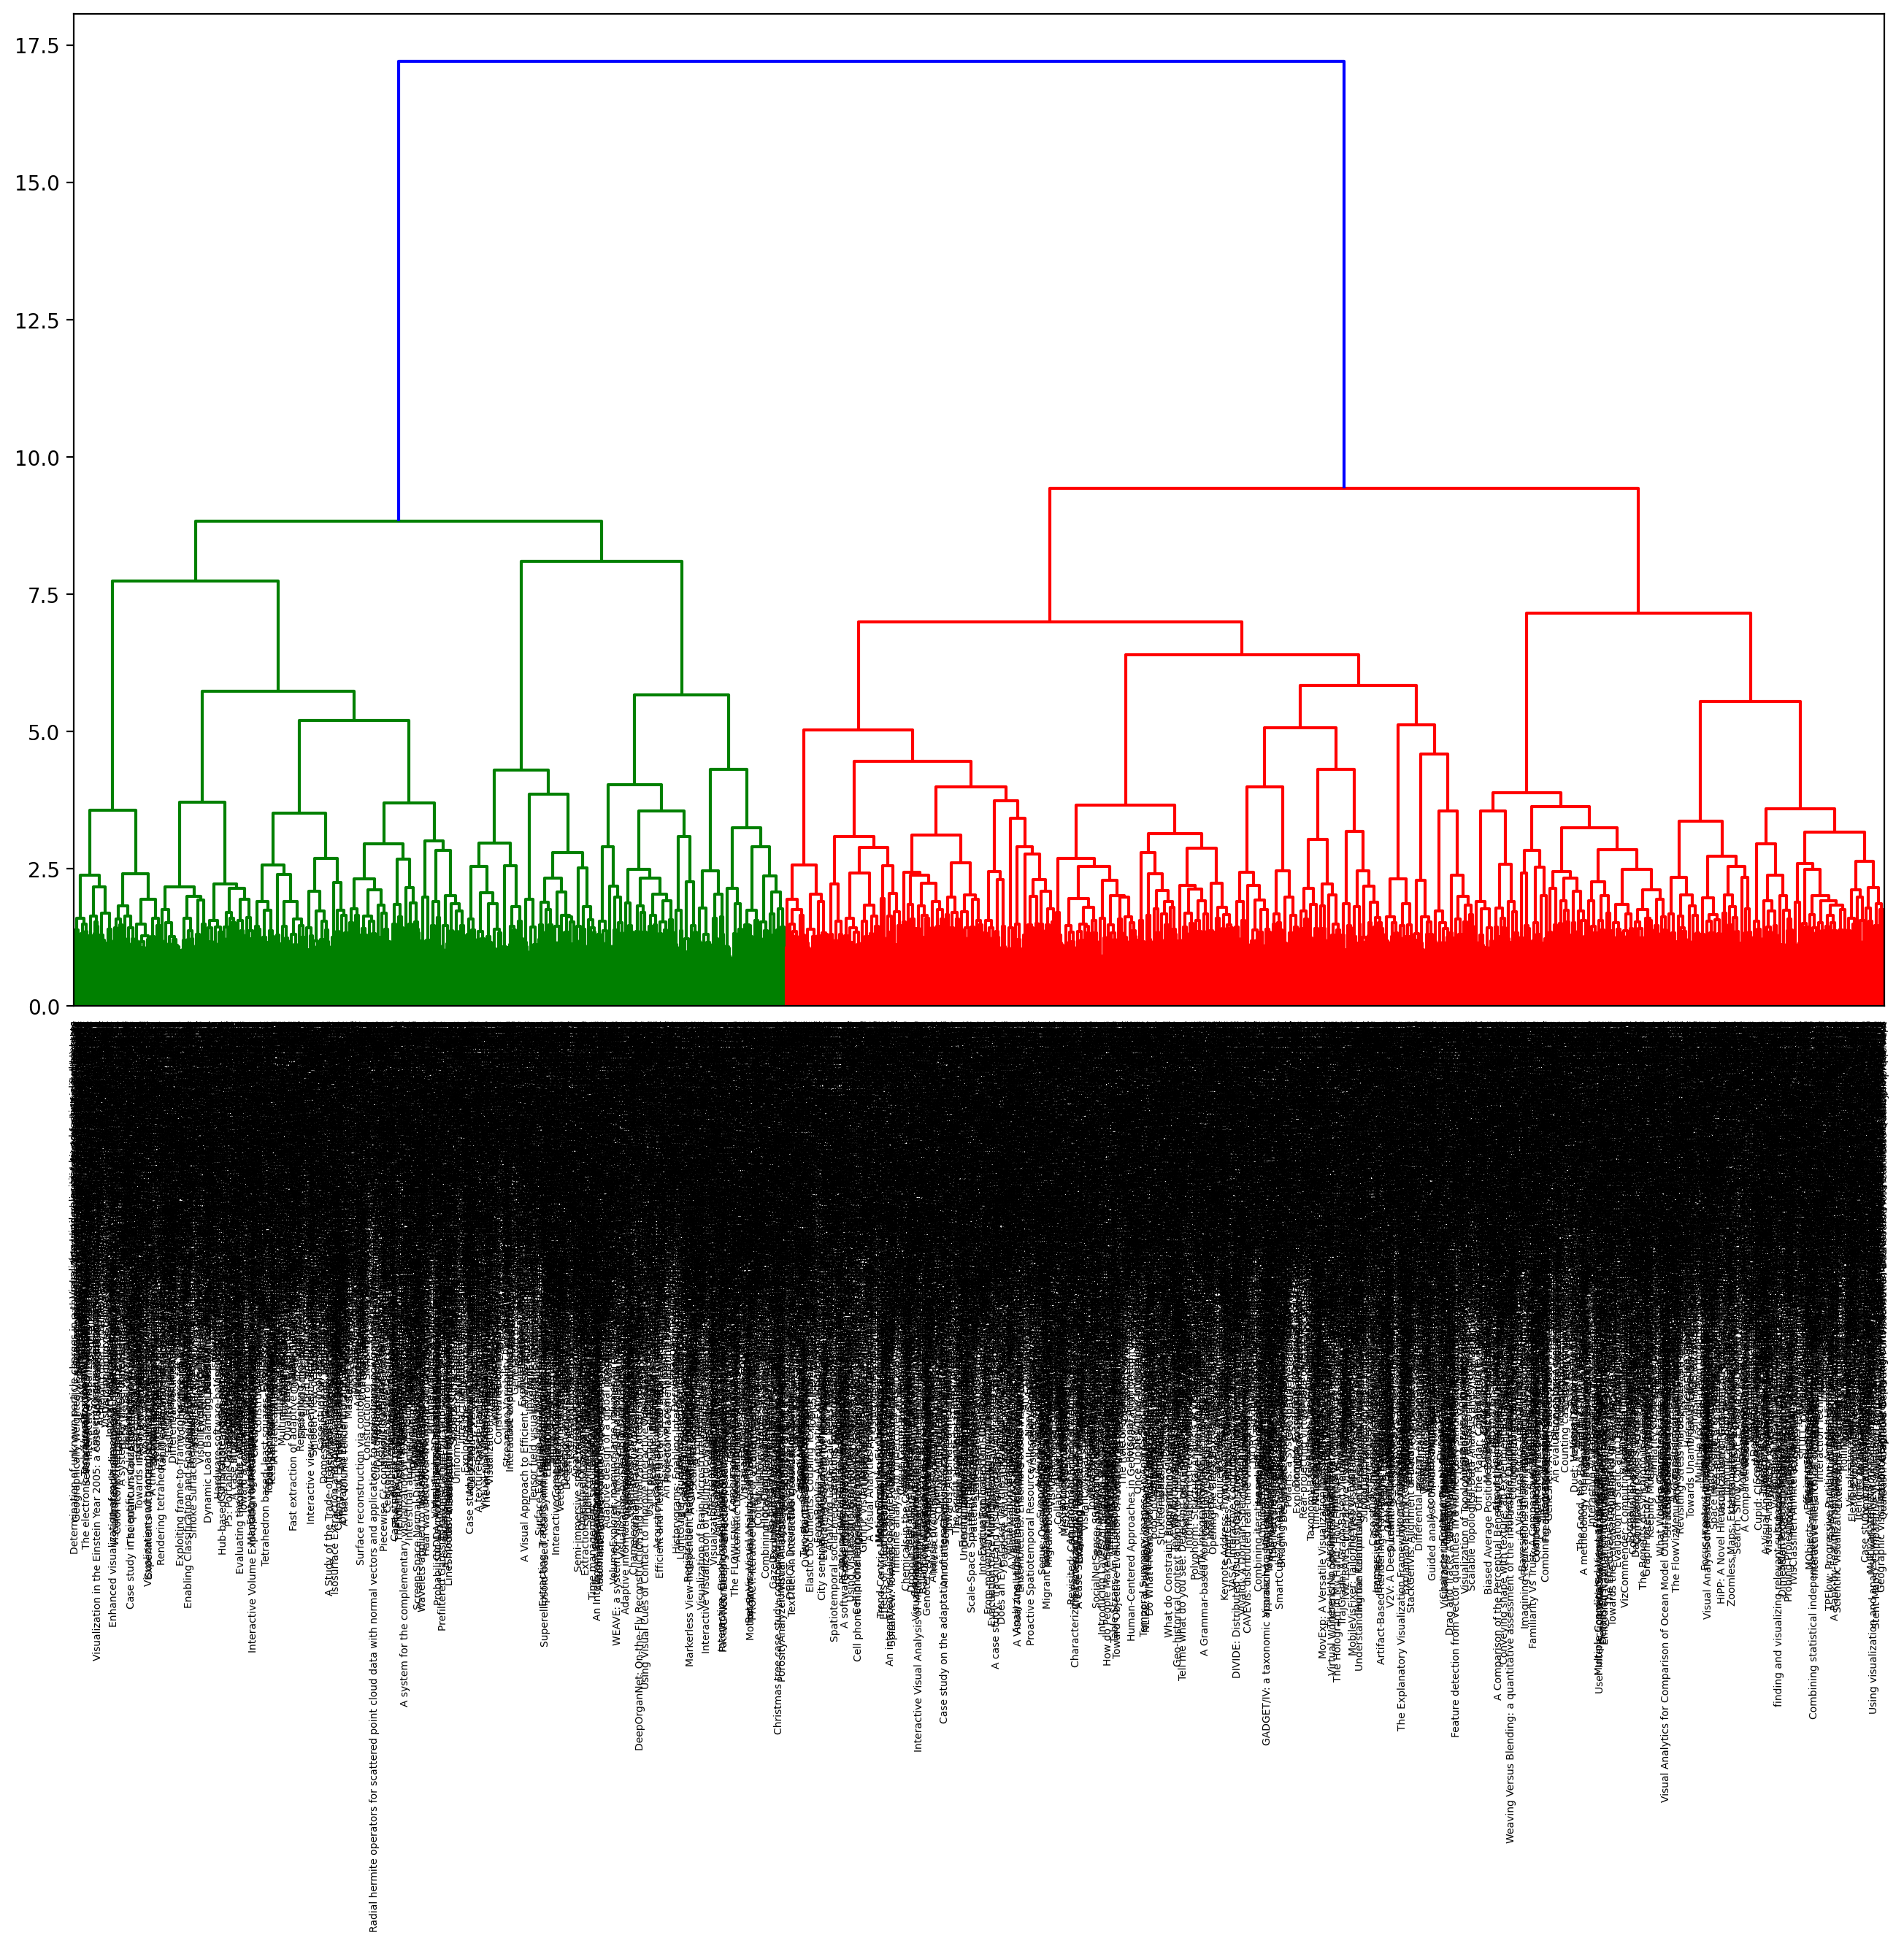

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
 
linkage_result = linkage(model.document_vectors, method='ward', metric='euclidean')
plt.figure(num=None, figsize=(16, 9), dpi=200, facecolor='w', edgecolor='k')
dendrogram(linkage_result, labels=plot_titles)
plt.show()

In [ ]:
obj = []
for i, (id, title, document) in enumerate(zip(plot_ids, plot_titles, documents)):
    topvec = []
    topic_nums, topic_score, topic_words, word_scores = model.get_documents_topics(doc_ids=[i], num_topics = 1)
    for word, score in zip(topic_words[0], word_scores[0]):
        topvec.append({'word':word,
                        'score':float(score * topic_score[0])})
    obj.append({'no':str(int(i)),
                'parent':'',
                'distance':0,
                'Title':title,
                'Abstract':document,
                'Conference':df['Conference'][id],
                'MultipartiteRank':topvec})
    
for i in range(len(linkage_result)):
    obj.append({'no':str(len(linkage_result)+i+1),
                'parent':'',
                'distance':linkage_result[i][2],
                'Title':'',
                'Abstract':'',
                'AuthorKeywords':[],
                'Conference':'',
                'MultipartiteRank':[]
                })

for i in range(len(obj)):
    if i % 1000 == 0 :
        print('running', i)
    for j in range(len(linkage_result)):
        if int(obj[i]['no']) == linkage_result[j][0] or int(obj[i]['no']) == linkage_result[j][1]:
            obj[i]['parent'] = str(len(linkage_result)+j+1)

running 0
running 1000
running 2000
running 3000
running 4000
running 5000
running 6000


In [ ]:
import json
with open('/content/drive/MyDrive/Colab Notebooks/judgit/220516v2.json', 'w', encoding='utf8')as f:
    json.dump(obj, f, indent=2, ensure_ascii=False)

In [ ]:
import csv
import pandas as pd
with open('/content/drive/MyDrive/Colab Notebooks/tdb/Tweets.csv', 'r')as f:
    df = pd.read_csv(f)

In [ ]:
df

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive


In [ ]:
documents = []
plot_titles = []
plot_ids = []
for i, (id, text) in enumerate(zip(df['textID'], df['text'])):
    if type(text) == str:
        documents.append(' '.join(lemmatize_sentence(text)))
        plot_ids.append(id)

In [ ]:
from gensim.models.doc2vec import Doc2Vec
from gensim.models.doc2vec import TaggedDocument
trainings = []
for id, text in zip(df['textID'], df['text']):
    if type(text) == str:
        trainings.append(TaggedDocument(lemmatize_sentence(text), id))

In [ ]:
doc2vec_model = Doc2Vec(trainings, epochs=30, min_alpha=1e-4, sample=1e-3, min_count=4, window=15, vector_size=50)

In [ ]:
callable(TaggedDocument)

True

In [ ]:
model = Top2Vec(documents,  
                embedding_model=doc2vec_model,
                use_embedding_model_tokenizer=True,
                split_documents=True,
                document_chunker='random')

ValueError: ignored

In [ ]:
from top2vec import Top2Vec
model = Top2Vec(documents, embedding_model=callable, embedding_model_path=doc2vec_model,
                umap_args = {'n_neighbors': 15,
                             'n_components': 5,
                             'metric': 'cosine',
                             'random_state': 5})

2022-05-30 22:16:38,381 - top2vec - INFO - Pre-processing documents for training
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
2022-05-30 22:16:39,450 - top2vec - INFO - Creating joint document/word embedding
2022-05-30 22:16:39,465 - top2vec - INFO - Creating lower dimension embedding of documents
2022-05-30 22:16:50,325 - top2vec - INFO - Finding dense areas of documents
2022-05-30 22:16:50,348 - top2vec - INFO - Finding topics


AxisError: ignored